### IMPORTANDO AS BIBLIOTECAS

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### IMPORTANDO O DATAFRAME

In [2]:
df_CENIPA = pd.read_csv("https://raw.githubusercontent.com/EdsonMSouza/08_T22_QUI_N/main/CENIPA/ocorrencias_cenipa.csv", sep=';', encoding='latin-1')

In [3]:
df_CENIPA.head()# 5 primeiras linhas

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,12/01/2010,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,08/04/2010,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,19/03/2010,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,21/03/2010,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,10/03/2010,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


### VERIFICANDO AS COLUNAS

In [4]:
df_CENIPA.columns.values

array(['codigo', 'tipo', 'descricao', 'cidade', 'estado', 'data', 'ano',
       'hora', 'aeronave_liberada', 'status_investigacao',
       'aeronaves_envolvidas', 'ocorrencia_saida_pista', 'aeronave_tipo',
       'aeronave_fabricante', 'motor_tipo', 'aeronave_motor_quantidade',
       'aeronave_assentos', 'aeronave_ano_fabricacao',
       'aeronave_pais_fabricante', 'aeronave_fase_operacao',
       'aeronave_nivel_dano'], dtype=object)

### SELECIONANDO COLUNAS

In [5]:
colunasSelecionadas = ['tipo','cidade','estado','data','aeronave_nivel_dano','ano']
colunasSelecionadas = df_CENIPA.filter(items = colunasSelecionadas)
print(colunasSelecionadas)

                 tipo                 cidade estado        data  \
0            ACIDENTE                 GURUPÁ     PA  12/01/2010   
1            ACIDENTE       UNIÃO DA VITÓRIA     PR  08/04/2010   
2            ACIDENTE           CAMPO GRANDE     MS  19/03/2010   
3            ACIDENTE               LUZIÂNIA     GO  21/03/2010   
4     INCIDENTE GRAVE            SANTA MARIA     RS  10/03/2010   
...               ...                    ...    ...         ...   
5237         ACIDENTE           ASSIS BRASIL     AC  23/10/2019   
5238         ACIDENTE  SÃO JOSÉ DO RIO CLARO     MT  11/10/2019   
5239         ACIDENTE               ANTONINA     PR  21/09/2019   
5240        INCIDENTE          FLORIANÓPOLIS     SC  20/12/2019   
5241         ACIDENTE         NOVO PROGRESSO     PA  20/01/2017   

     aeronave_nivel_dano   ano  
0                   LEVE  2010  
1            SUBSTANCIAL  2010  
2            SUBSTANCIAL  2010  
3              DESTRUÍDA  2010  
4                   LEVE  2010

### QUANTIDADE DE INCIDENTES/ACIDENTES POR ESTADO

AC      54
AL      30
AM     217
AP       9
BA     200
CE      78
DF     129
ES      70
GO     286
MA      68
MG     482
MS     132
MT     255
PA     263
PB      23
PE      90
PI      36
PR     441
RJ     480
RN      14
RO      30
RR      49
RS     334
SC     166
SE      21
SP    1239
TO      46
Name: estado, dtype: int64

A média estadual de acidentes/incidentes é: 194.14814814814815


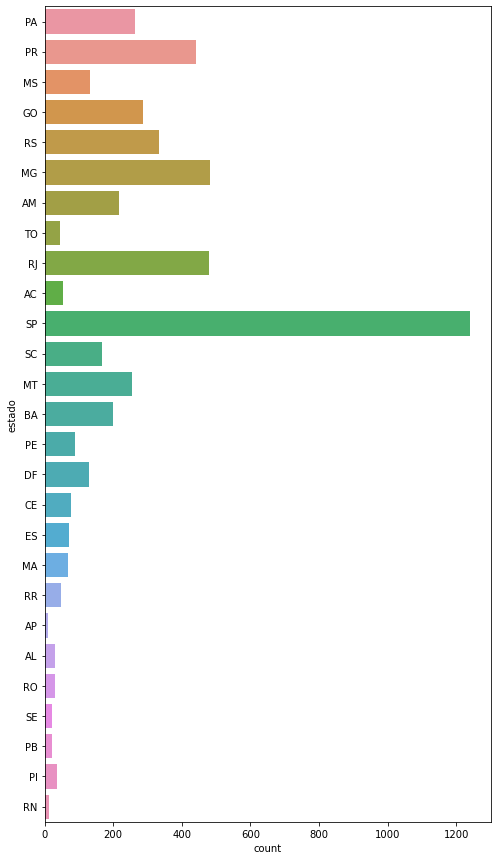

In [6]:
coluna_nomeEstado = colunasSelecionadas['estado']
incac_estado = coluna_nomeEstado.value_counts().sort_index()

media_estado = incac_estado.mean()

plt.figure(figsize = (8,15))
sns.countplot(data = colunasSelecionadas, y='estado')

print(incac_estado)
print('')
print('A média estadual de acidentes/incidentes é: {}'.format(media_estado))

### INCIDENTES/ACIDENTES POR ANO

2010    552
2011    576
2012    647
2013    653
2014    567
2015    471
2016    403
2017    434
2018    443
2019    496
Name: ano, dtype: int64

A média anual de acidentes/incidentes é: 524.2


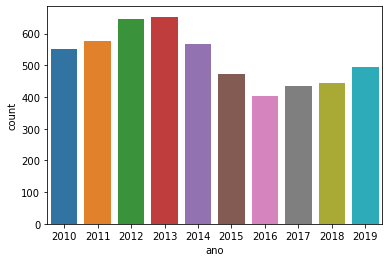

In [8]:
coluna_ano = colunasSelecionadas['ano']
incac_ano = coluna_ano.value_counts().sort_index()

media_ano= incac_ano.mean()

sns.countplot(data = colunasSelecionadas, x ='ano')

print(incac_ano)
print('')
print('A média anual de acidentes/incidentes é: {}'.format(media_ano))

###  ACIDENTES POR ANO 

In [10]:
acidentes = colunasSelecionadas[colunasSelecionadas['tipo'] == 'ACIDENTE']
qtde_acidentes = int(acidentes.shape[0])
print('O total de acidentes é de {}'.format(qtde_acidentes))

anos = coluna_ano.value_counts()
qtde_anos = int(anos.shape[0])


media_acidentes = qtde_acidentes / qtde_anos
print('A média de acidentes é de {} por ano'.format(media_acidentes))

O total de acidentes é de 1694
A média de acidentes é de 169.4 por ano


### COMPARAÇÃO INCIDENTES X ACIENTES

ACIDENTE           1694
INCIDENTE          2887
INCIDENTE GRAVE     661
Name: tipo, dtype: int64

A média estadual de acidentes/incidentes é: 194.14814814814815


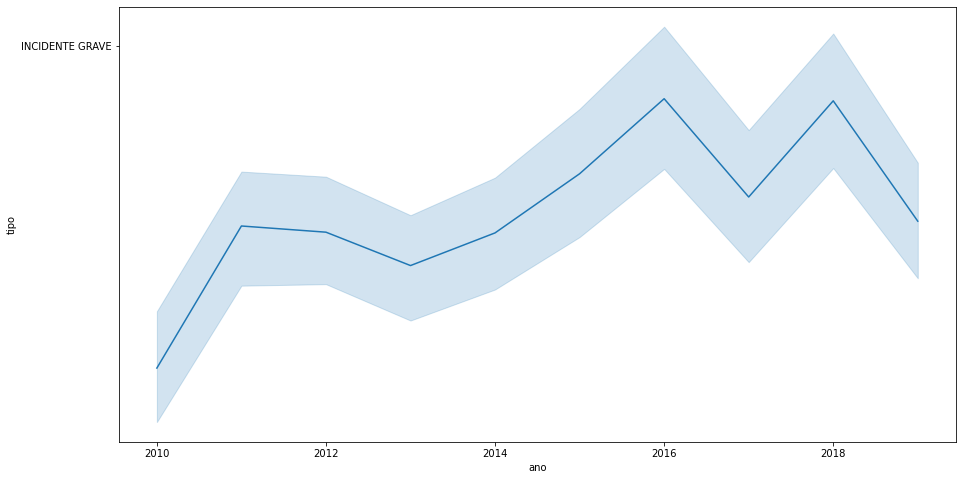

In [8]:
coluna_tipo = colunasSelecionadas['tipo']
total_tipos = coluna_tipo.value_counts().sort_index()

#media_estado = incac_estado.mean()

plt.figure(figsize = (15,8))
sns.lineplot(x = 'ano', y = 'tipo', data = colunasSelecionadas)

print(total_tipos)
print('')
print('A média estadual de acidentes/incidentes é: {}'.format(media_estado))

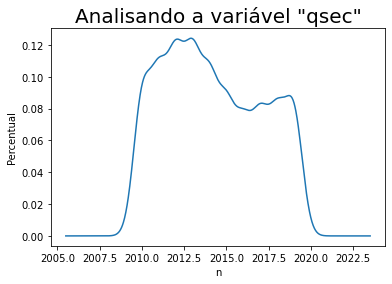

In [12]:
colunasSelecionadas.ano.plot(kind= 'density') # kind é o tipo do gráfico (line, bar, barh)

# definindo um título
plt.title('Analisando a variável "qsec"', fontdict={'fontsize': 20})

# definindo labels para os eixos
plt.xlabel('n')
plt.ylabel('Percentual')
plt.show()

In [16]:
coluna_ano = colunasSelecionadas['ano']
incac_ano = coluna_ano.value_counts().sort_index()

media_ano= incac_ano.mean()

sns.countplot(data = colunasSelecionadas, x ='ano', y = )

print(incac_ano)
print('')
print('A média anual de acidentes/incidentes é: {}'.format(media_ano))

SyntaxError: invalid syntax (<ipython-input-16-f0b8d0958d11>, line 6)